In [28]:
import pandas as pd
import numpy
from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import explained_variance_score

from collections import namedtuple

In [2]:
df = pd.read_pickle('bikeshare.pkl')

In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
X,y = df[['Hour','Temperature(°C)']], df['Rented Bike Count']

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [19]:
Model = namedtuple('Model', ['r2', 'std', 'med_abs_err'])
lr = LinearRegression().fit(X,y)

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
lr_cv_mean, lr_cv_standard_dev = np.mean(cross_val_score(lr, X, y, cv=kf, scoring='r2')), np.std(cross_val_score(lr, X, y, cv=kf, scoring='r2'))

In [30]:
predictions = lr.predict(X)
actual = y

In [31]:
explained_variance_score(actual,predictions)

0.41048590579645716

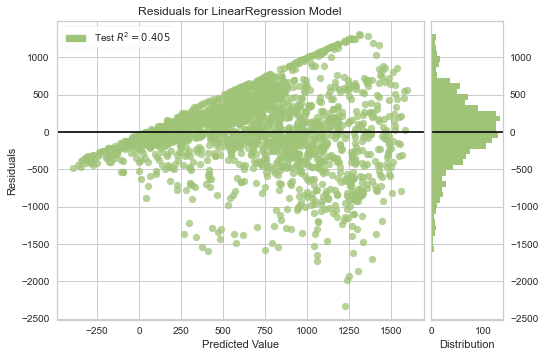

In [32]:
visualizer = ResidualsPlot(lr)
visualizer.score(X_test,y_test)
visualizer.show()